# Set Up

In [45]:
import matplotlib.pyplot as plt # for making basic graphs

import pandas as pd # for manipulating dataframes
import numpy as np # for manipulating arrays

from sklearn import metrics # for computing accuracy, precision, and recall

from sklearn.model_selection import train_test_split, RandomizedSearchCV # for splitting the data and cross validating

from sklearn.ensemble import RandomForestClassifier # for creating the random forest classifier

In [46]:
# read in data
ws = pd.read_csv('water_zebras.csv').drop('Unnamed: 0', axis = 1)
ws.columns

Index(['Date', 'Loop', 'Whitesheet.Filename', 'Whitesheet.Entry.Number',
       'Time', 'GPS.x', 'GPS.y', 'Distance', 'Direction', 'Corrected.GPS.x',
       'Corrected.GPS.y', 'Latitude', 'Longitude', 'Species', 'Multispecies',
       'Sun', 'Wind', 'Rain', 'Other.species', 'Activity', 'Grass.height',
       'Grass.color', 'Grass.spp.1', 'Grass.spp.2', 'Grass.spp.3',
       'Grass.spp.4', 'Bush.type', 'Pic.Start.72.', 'Pic.End.72.',
       'Pic.Start.79.', 'Pic.End.79.', 'Total.zebras', 'Male..T.', 'Male..B.',
       'Female..NL.', 'Female..L.', 'Female..P.', 'X2.year.old', 'X1.year.old',
       'X6.12.months.old', 'X3.6.months.old', 'X1.3.months.old',
       'X0.1.months.old', 'Notes', 'Distance.to.water', 'Location', 'ws_ndvi'],
      dtype='object')

# Prepare Data

In [47]:
# get hour to simplify time analysis
Hour = []
for i in range(0, len(ws)):
    Hour.append(int(ws['Time'].str.split(pat = ":")[i][0]))

In [48]:
Hour

[8,
 9,
 9,
 10,
 10,
 10,
 11,
 11,
 12,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 9,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 8,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 8,
 8,
 8,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 9,
 9,
 9,
 9,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 9,
 9,
 10,
 10,
 11,
 11,
 11,
 12

In [49]:
# add to white sheets
ws['Hour'] = Hour

In [50]:
# subset data to only get relevant variables/columns
ws_sub = ws[['Species', 'Hour', 'Sun', 'Wind', 'Rain', 'Corrected.GPS.x', 'Corrected.GPS.y', 'Activity', 'Grass.height', 'Grass.color', 'Bush.type', 'Total.zebras', 'Distance.to.water', 'ws_ndvi']]

In [51]:
ws_sub

,Species,Hour,Sun,Wind,Rain,Corrected.GPS.x,Corrected.GPS.y,Activity,Grass.height,Grass.color,Bush.type,Total.zebras,Distance.to.water,ws_ndvi
0,GZ,8,FS,MW,NR,265054.9313,32103.87573,Re,hock,BG,TB,7,7.469659e+06,0.138068
1,GZ,9,PS,LW,NR,264888.9707,31087.88924,Gr,hock,BG,LB,1,1.316887e+07,0.175742
2,PZ,9,PS,LW,NR,264888.9707,31087.88924,Gr,hock,BG,LB,9,1.316887e+07,0.175742
3,PZ,10,NS,LW,NR,265017.5535,32139.22170,Wa,hoof,BG,MB,11,7.193445e+06,0.136767
4,GZ,10,PS,LW,NR,264265.0000,34215.00000,St,hoof,GB,OG,1,1.813812e+05,0.215612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,GZ,10,FS,MW,NR,265476.5570,35438.92432,Gr,belly,B,MB,7,3.050676e+06,0.127213
510,PZ,10,FS,MW,NR,265476.5570,35438.92432,Gr,belly,B,MB,2,3.050676e+06,0.127213
511,PZ,10,FS,SW,NR,263049.2917,37073.50000,Gr,hoof,B,LB,22,1.652017e+05,0.153282
512,GZ,11,FS,LW,NR,263477.0899,39670.83289,Gr,hoof,B,LB,1,1.670947e+05,0.101741


# Exploratory Data Analysis

In [52]:
# check for NAs
ws_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species            514 non-null    object 
 1   Hour               514 non-null    int64  
 2   Sun                514 non-null    object 
 3   Wind               514 non-null    object 
 4   Rain               513 non-null    object 
 5   Corrected.GPS.x    514 non-null    float64
 6   Corrected.GPS.y    514 non-null    float64
 7   Activity           513 non-null    object 
 8   Grass.height       514 non-null    object 
 9   Grass.color        514 non-null    object 
 10  Bush.type          511 non-null    object 
 11  Total.zebras       514 non-null    int64  
 12  Distance.to.water  514 non-null    float64
 13  ws_ndvi            514 non-null    float64
dtypes: float64(4), int64(2), object(8)
memory usage: 56.3+ KB


In [53]:
# get rid of row with null
ws_sub = ws_sub.dropna(axis = 0)
ws_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 513
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species            509 non-null    object 
 1   Hour               509 non-null    int64  
 2   Sun                509 non-null    object 
 3   Wind               509 non-null    object 
 4   Rain               509 non-null    object 
 5   Corrected.GPS.x    509 non-null    float64
 6   Corrected.GPS.y    509 non-null    float64
 7   Activity           509 non-null    object 
 8   Grass.height       509 non-null    object 
 9   Grass.color        509 non-null    object 
 10  Bush.type          509 non-null    object 
 11  Total.zebras       509 non-null    int64  
 12  Distance.to.water  509 non-null    float64
 13  ws_ndvi            509 non-null    float64
dtypes: float64(4), int64(2), object(8)
memory usage: 59.6+ KB


In [54]:
# look for weird values
for v in ws_sub.columns:
    arr = np.array(ws_sub[v])
    print(v, ": ", np.unique(arr))

Species :  ['GZ' 'PZ']
Hour :  [ 8  9 10 11 12 13 14 15]
Sun :  ['FS' 'NS' 'PS']
Wind :  ['LW' 'Lw' 'MR' 'MW' 'NW' 'SW']
Rain :  ['LR' 'NR']
Corrected.GPS.x :  [257997.2968 258012.8327 258017.6077 258114.     258120.7069 258224.1107
 258276.7444 258287.6184 258394.7083 258406.4966 258540.6457 258671.3909
 258727.2827 258733.0029 258767.1531 258771.1295 258887.6885 258892.325
 258968.6808 258969.9495 259013.5049 259026.     259093.6379 259097.6381
 259103.8597 259113.1889 259117.2867 259120.5877 259127.1673 259151.4327
 259154.3619 259238.5872 259247.425  259273.     259282.1103 259338.2391
 259348.7083 259394.2818 259434.5673 259436.     259453.79   259460.9968
 259505.7705 259508.7802 259509.7032 259521.5    259542.775  259587.2231
 259637.2749 259662.5027 259680.     259699.0333 259707.2442 259718.6873
 259723.6004 259743.6515 259749.5324 259770.7129 259783.8034 259829.5
 259937.1919 259945.8893 259994.1472 260003.5    260052.     260052.759
 260075.1103 260113.568  260117.5    26011

In [55]:
# drop row with 'hoof' as activity
ws_sub = ws_sub[ws_sub['Activity'] != 'hoof']

In [56]:
# replace "GR" with "Gr"
ws_sub = ws_sub.replace('GR', "Gr")

# check it worked
np.unique(np.array(ws_sub['Activity']))

array(['Dr', 'Gr', 'Re', 'St', 'Wa'], dtype=object)

In [57]:
# replace 'G ' with 'G'
ws_sub = ws_sub.replace('G ', 'G')

np.unique(np.array(ws_sub['Grass.color']))

array(['B', 'BG', 'G', 'GB'], dtype=object)

In [58]:
# replace 'Lw' with "LW"
ws_sub = ws_sub.replace('Lw', "LW")

# check it worked
np.unique(np.array(ws_sub['Wind']))

array(['LW', 'MR', 'MW', 'NW', 'SW'], dtype=object)

In [59]:
# drop row with 'MR' as wind
ws_sub = ws_sub[ws_sub['Wind'] != 'MR']

# check it worked
np.unique(np.array(ws_sub['Wind']))

array(['LW', 'MW', 'NW', 'SW'], dtype=object)

In [60]:
len(ws_sub)

505

# Balancing the Data

In [61]:
# Grevy's class size
gz = ws_sub[ws_sub['Species'] == "GZ"]
len(gz)

151

In [62]:
# plains class size
pz = ws_sub[ws_sub['Species'] == "PZ"]
len(pz)

354

In [63]:
# undersample data
pz_sub = pz.sample(n = len(gz), random_state = 2023)

In [64]:
# combine undersampled data
balanced = pd.concat([gz, pz_sub], axis = 0)

In [65]:
balanced

,Species,Hour,Sun,Wind,Rain,Corrected.GPS.x,Corrected.GPS.y,Activity,Grass.height,Grass.color,Bush.type,Total.zebras,Distance.to.water,ws_ndvi
0,GZ,8,FS,MW,NR,265054.9313,32103.87573,Re,hock,BG,TB,7,7.469659e+06,0.138068
1,GZ,9,PS,LW,NR,264888.9707,31087.88924,Gr,hock,BG,LB,1,1.316887e+07,0.175742
4,GZ,10,PS,LW,NR,264265.0000,34215.00000,St,hoof,GB,OG,1,1.813812e+05,0.215612
10,GZ,15,FS,LW,NR,264435.8739,39135.07171,St,hock,GB,LB,1,1.896672e+04,0.204795
12,GZ,15,FS,LW,NR,265163.0649,40116.25003,Wa,hock,GB,LB,1,4.104064e+05,0.176037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,PZ,9,FS,MW,NR,263767.7850,38871.13598,Gr,hock,BG,LB,10,3.118766e+05,0.216815
217,PZ,9,NS,SW,NR,263902.5473,35747.20064,Gr,hock,BG,LB,5,1.266971e+06,0.145118
141,PZ,10,FS,LW,NR,263123.6685,39413.64052,Dr,hoof,G,LB,12,8.671022e+03,0.190907
475,PZ,10,PS,LW,NR,262107.5000,44622.16730,Wa,hock,B,MB,12,3.743189e+04,0.113868


# Getting the Dummies

In [66]:
# replace plains with 1, Grevy's with 0
balanced['Species'].replace(["GZ", "PZ"],
                             [0, 1], inplace=True)

# check that replacement worked
print(balanced.head())
print(balanced.tail())
balanced['Species'].dtype

    Species  Hour Sun Wind Rain  Corrected.GPS.x  Corrected.GPS.y Activity  \
0         0     8  FS   MW   NR      265054.9313      32103.87573       Re   
1         0     9  PS   LW   NR      264888.9707      31087.88924       Gr   
4         0    10  PS   LW   NR      264265.0000      34215.00000       St   
10        0    15  FS   LW   NR      264435.8739      39135.07171       St   
12        0    15  FS   LW   NR      265163.0649      40116.25003       Wa   

   Grass.height Grass.color Bush.type  Total.zebras  Distance.to.water  \
0          hock          BG        TB             7       7.469659e+06   
1          hock          BG        LB             1       1.316887e+07   
4          hoof          GB        OG             1       1.813812e+05   
10         hock          GB        LB             1       1.896672e+04   
12         hock          GB        LB             1       4.104064e+05   

     ws_ndvi  
0   0.138068  
1   0.175742  
4   0.215612  
10  0.204795  
12  0.17603

dtype('int64')

In [67]:
# get x categoricals
x_cat = balanced.select_dtypes(include = object)

# get dummies
dummies = pd.get_dummies(x_cat)
dummies.head()

,Sun_FS,Sun_NS,Sun_PS,Wind_LW,Wind_MW,Wind_NW,Wind_SW,Rain_LR,Rain_NR,Activity_Dr,...,Grass.height_hock,Grass.height_hoof,Grass.color_B,Grass.color_BG,Grass.color_G,Grass.color_GB,Bush.type_LB,Bush.type_MB,Bush.type_OG,Bush.type_TB
0,1,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,0,0,1,1,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
4,0,0,1,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
10,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
12,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0


# Preparing Training and Test Data

In [68]:
# get continuous x variables, dropping the Species column
x_cont = balanced.select_dtypes(exclude = object).drop(['Species'], axis = 1)
x_cont

,Hour,Corrected.GPS.x,Corrected.GPS.y,Total.zebras,Distance.to.water,ws_ndvi
0,8,265054.9313,32103.87573,7,7.469659e+06,0.138068
1,9,264888.9707,31087.88924,1,1.316887e+07,0.175742
4,10,264265.0000,34215.00000,1,1.813812e+05,0.215612
10,15,264435.8739,39135.07171,1,1.896672e+04,0.204795
12,15,265163.0649,40116.25003,1,4.104064e+05,0.176037
...,...,...,...,...,...,...
30,9,263767.7850,38871.13598,10,3.118766e+05,0.216815
217,9,263902.5473,35747.20064,5,1.266971e+06,0.145118
141,10,263123.6685,39413.64052,12,8.671022e+03,0.190907
475,10,262107.5000,44622.16730,12,3.743189e+04,0.113868


In [69]:
# get y variable
y = balanced['Species']

In [70]:
# combine continuous and dummy x variables
x = pd.concat([x_cont, dummies], axis = 1)
x

,Hour,Corrected.GPS.x,Corrected.GPS.y,Total.zebras,Distance.to.water,ws_ndvi,Sun_FS,Sun_NS,Sun_PS,Wind_LW,...,Grass.height_hock,Grass.height_hoof,Grass.color_B,Grass.color_BG,Grass.color_G,Grass.color_GB,Bush.type_LB,Bush.type_MB,Bush.type_OG,Bush.type_TB
0,8,265054.9313,32103.87573,7,7.469659e+06,0.138068,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,9,264888.9707,31087.88924,1,1.316887e+07,0.175742,0,0,1,1,...,1,0,0,1,0,0,1,0,0,0
4,10,264265.0000,34215.00000,1,1.813812e+05,0.215612,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
10,15,264435.8739,39135.07171,1,1.896672e+04,0.204795,1,0,0,1,...,1,0,0,0,0,1,1,0,0,0
12,15,265163.0649,40116.25003,1,4.104064e+05,0.176037,1,0,0,1,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,9,263767.7850,38871.13598,10,3.118766e+05,0.216815,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
217,9,263902.5473,35747.20064,5,1.266971e+06,0.145118,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
141,10,263123.6685,39413.64052,12,8.671022e+03,0.190907,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
475,10,262107.5000,44622.16730,12,3.743189e+04,0.113868,0,0,1,1,...,1,0,1,0,0,0,0,1,0,0


In [71]:
# get training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        test_size=0.2, 
                                                        random_state=2023,
                                                        stratify = y)

# Fitting the Random Forest Model

In [72]:
# hyperparameters to search over
hyperparameters = {'n_estimators':[x for x in range(100, 701, 100)], 
                   'min_samples_split': [x for x in range(5, 45, 5)], 
                   'n_jobs' : [-1],             
                   'random_state' : [2023],
                   'max_features': [x for x in range(1, 15, 2)], 
                   'oob_score' : [True]
                  }

In [73]:
# create random forest classifier
rf = RandomForestClassifier(random_state = 2023)

# randomized search cross-validation to find the best hyperparameters
randomized_search = RandomizedSearchCV(estimator=rf,
                                       param_distributions=hyperparameters,
                                       n_iter=12, 
                                       cv=5, 
                                       n_jobs = -1,
                                       random_state=2023)
randomized_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2023),
                   n_iter=12, n_jobs=-1,
                   param_distributions={'max_features': [1, 3, 5, 7, 9, 11, 13],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30, 35, 40],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700],
                                        'n_jobs': [-1], 'oob_score': [True],
                                        'random_state': [2023]},
                   random_state=2023)

In [74]:
# get the best hyperparameters and fit the model with them
best_hyperparameters = randomized_search.best_params_
best_rf = RandomForestClassifier(**best_hyperparameters)

In [75]:
# examine best hyperparameters
best_hyperparameters

{'random_state': 2023,
 'oob_score': True,
 'n_jobs': -1,
 'n_estimators': 700,
 'min_samples_split': 40,
 'max_features': 13}

In [76]:
# examine best RF model
best_rf

RandomForestClassifier(max_features=13, min_samples_split=40, n_estimators=700,
                       n_jobs=-1, oob_score=True, random_state=2023)

In [77]:
# fit the model
best_rf.fit(x_train, y_train)

RandomForestClassifier(max_features=13, min_samples_split=40, n_estimators=700,
                       n_jobs=-1, oob_score=True, random_state=2023)

In [78]:
# predict on the test set
y_pred = best_rf.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [87]:
# probabilities
y_pred_prob = best_rf.predict_proba(x_test)[:, 1]

In [88]:
y_pred_prob

array([0.6091259 , 0.47293419, 0.50950865, 0.2006439 , 0.83374129,
       0.25486187, 0.74723606, 0.59997792, 0.29743467, 0.65309756,
       0.47175396, 0.23871959, 0.3410124 , 0.55098926, 0.20490543,
       0.79478773, 0.53232261, 0.59929448, 0.80802936, 0.56682656,
       0.78002704, 0.15830353, 0.29897717, 0.36958553, 0.70898635,
       0.54607393, 0.21060075, 0.82447041, 0.71824466, 0.22258577,
       0.6233558 , 0.22805778, 0.35801792, 0.54978502, 0.61659454,
       0.55618843, 0.59241507, 0.59557613, 0.21400558, 0.56122979,
       0.41532826, 0.13993436, 0.26497892, 0.74631712, 0.55089771,
       0.25794964, 0.72156329, 0.6971274 , 0.19345854, 0.48149403,
       0.33910818, 0.18975014, 0.37688793, 0.63695426, 0.46666141,
       0.64239778, 0.51251038, 0.58347668, 0.19234179, 0.27647272,
       0.49091008])

In [92]:
# calculate various performance metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)

print(f"Best hyperparameters: {best_hyperparameters}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC score: {roc_auc}")

Best hyperparameters: {'random_state': 2023, 'oob_score': True, 'n_jobs': -1, 'n_estimators': 700, 'min_samples_split': 40, 'max_features': 13}
Accuracy: 0.7540983606557377
Precision: 0.75
Recall: 0.7741935483870968
ROC AUC score: 0.8387096774193548


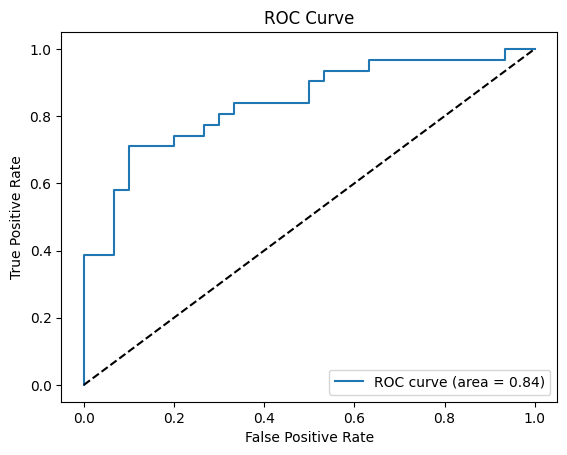

In [97]:
# print the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label = "ROC curve (area = %.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
plt.show()

# Looking at Feature Importances

In [80]:
# get feature importances
importances = best_rf.feature_importances_

# sort importances
sorted_indices = importances.argsort()[::-1]

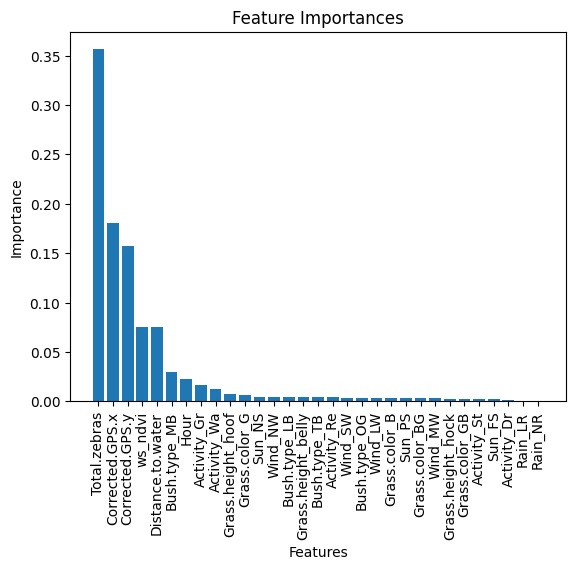

In [81]:
# plot importances
plt.bar(range(x.shape[1]), [importances[i] for i in sorted_indices])
plt.xticks(range(x.shape[1]), 
           [x.columns[i] for i in sorted_indices], 
           rotation=90)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

We can see that the most important factors are the number of zebras at the sighting (total zebras), the location of the sighting (GPS coordinates and distance to water), and the vegetation quality (NDVI). These results demonstrate how differences in the behavioral and environmental preferences of plains and Grevy's zebras can be used to distinguish the two species.